<a href="https://colab.research.google.com/github/tusharmoon/ML_Projets/blob/main/Anomalies_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

current_date--> 2023-12-31 00:00:00
previous_date--> 2021-12-01 00:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
<ipython-input-1-d00c23ab3a75>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_final['anomaly'] = model.fit_predict(d_final[['product_availability']])


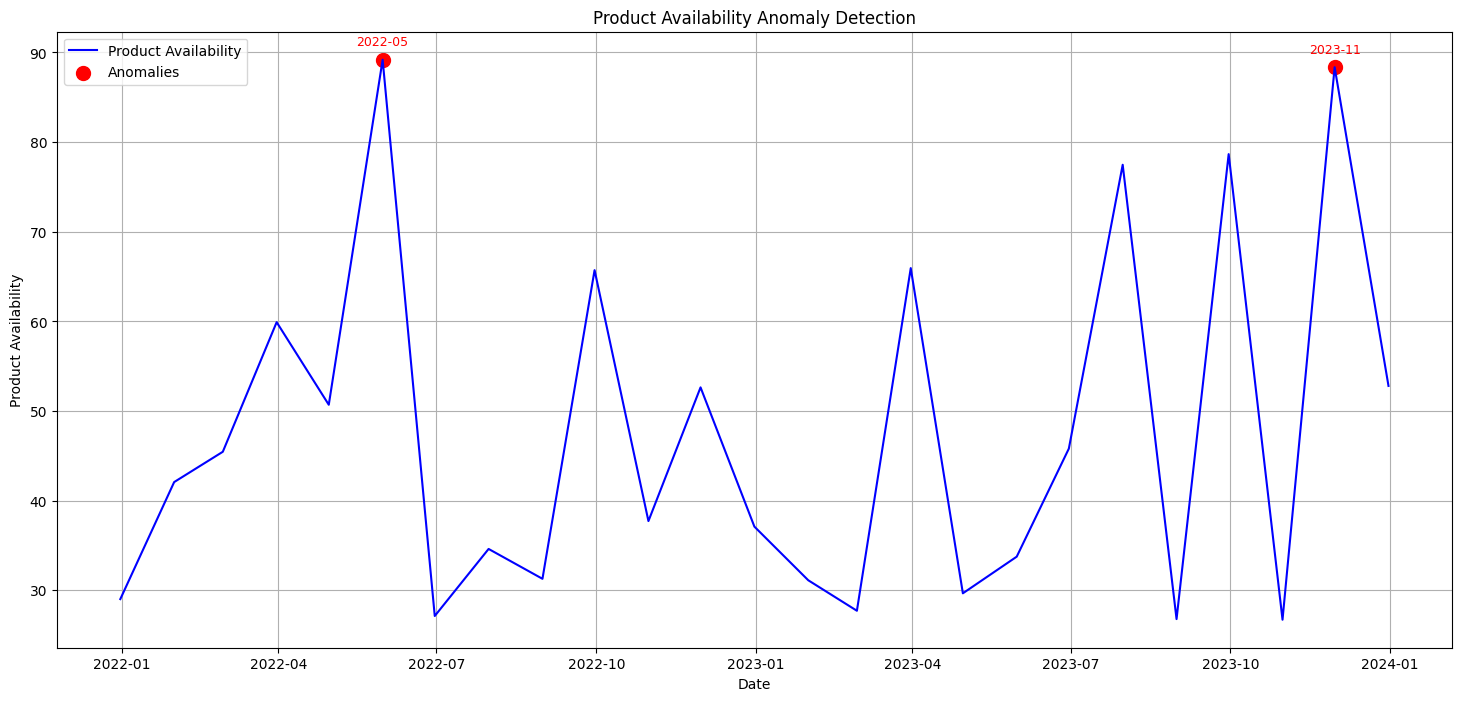

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Set Year and Month to find the Anomalies in the setting time period
current_year = 2023
current_month = 12

# Set a random seed for reproducibility
np.random.seed(0)

# Define the number of years and months
num_years = 7
months_per_year = 12
total_months = num_years * months_per_year

# Generate time dimensions (dates)
dates = pd.date_range(start='2018-01-01', periods=total_months, freq='M')

# Generate synthetic data for each factor
product_availability = np.random.uniform(20, 90, total_months)

# Create a DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Year':dates.year,
    'Month':dates.month,
    'product_availability': product_availability
})

#data.to_excel(r"Anomalies_Detection_Dataset.xlsx",index=False)

def get_previous_nth_month(current_year, current_month, delta_month):
    current_date = datetime(current_year, current_month, 1)
    previous_date = current_date - relativedelta(months=delta_month)
    return previous_date


#We have to get 8 Quarters worth of data i.e
#-------> 8 Quarters * 3 Months in each Quarter = 24 Months i.e 2 years worth of data

current_date = datetime(current_year, current_month, 31)
previous_date = get_previous_nth_month(current_year, current_month, delta_month=24)

print("current_date-->",current_date)
print("previous_date-->",previous_date)

d_final = data[(data['Date'] >= previous_date) & (data['Date'] <= current_date)]


# Create an Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=0)

# Fit the model to the product availability data
d_final['anomaly'] = model.fit_predict(d_final[['product_availability']])

# Visualize anomalies
plt.figure(figsize=(18, 8))
plt.plot(d_final['Date'], d_final['product_availability'], label='Product Availability', color='blue')

anomalies = d_final[d_final['anomaly'] == -1]

plt.scatter(anomalies['Date'], anomalies['product_availability'],
            label='Anomalies', color='red', marker='o', s=100)


for i, row in anomalies.iterrows():
    plt.annotate(f"{row['Year']}-{row['Month']:02}", (row['Date'], row['product_availability']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')

plt.title('Product Availability Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Product Availability')
plt.legend()
plt.grid(True)
plt.show()


**SOME MORE VISTULIZATION**

In [ ]:
d_fianl = d_final.copy()

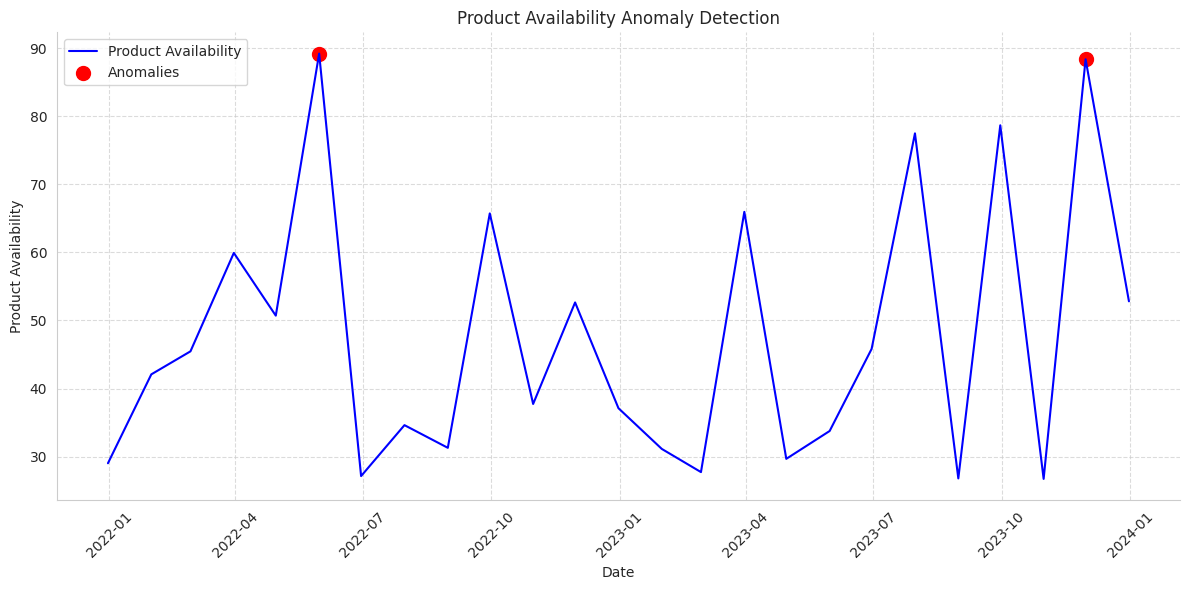

In [ ]:
import seaborn as sns
# Set a seaborn style for improved aesthetics
sns.set_style('whitegrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the Product Availability data
ax.plot(d_fianl['Date'], d_fianl['product_availability'], label='Product Availability', color='blue')

# Highlight anomalies with red color
anomalies = d_fianl[d_fianl['anomaly'] == -1]
ax.scatter(anomalies['Date'], anomalies['product_availability'], label='Anomalies', color='red', marker='o', s=100)

# Add title and labels
ax.set_title('Product Availability Anomaly Detection')
ax.set_xlabel('Date')
ax.set_ylabel('Product Availability')

# Add a legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Remove spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


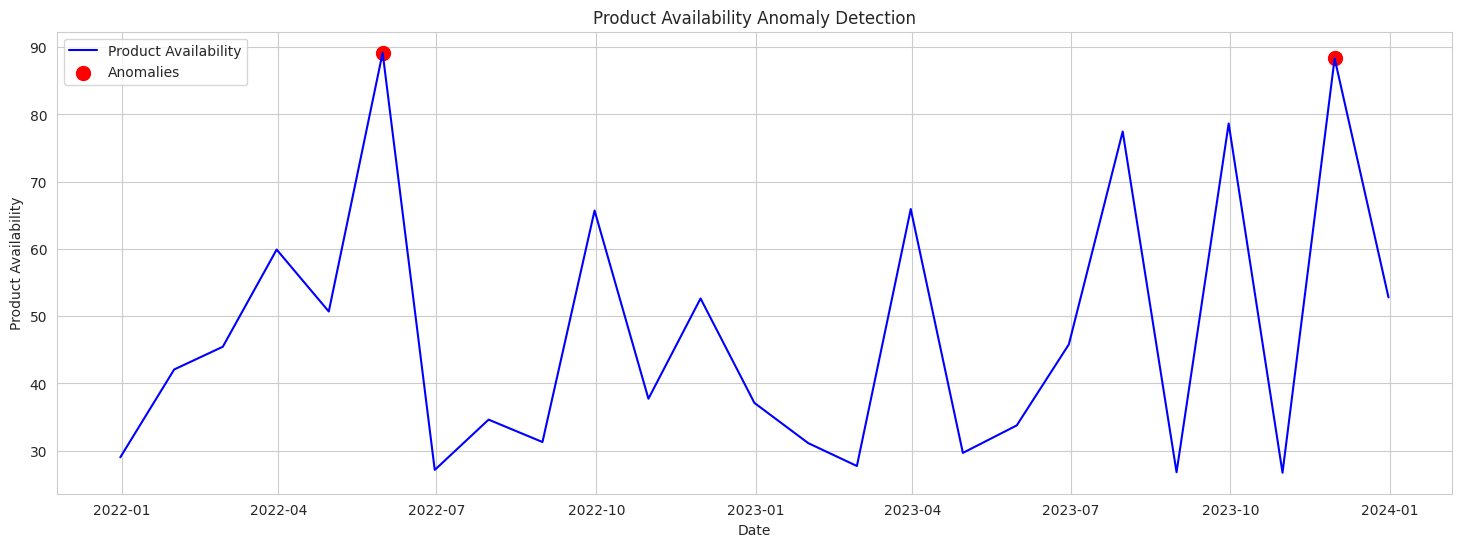

In [ ]:

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=0)

# Fit the model to the product availability data
d_fianl['anomaly'] = model.fit_predict(d_fianl[['product_availability']])

# Visualize anomalies
plt.figure(figsize=(18, 6))
plt.plot(d_fianl['Date'], d_fianl['product_availability'], label='Product Availability', color='blue')

plt.scatter(d_fianl[d_fianl['anomaly'] == -1]['Date'], d_fianl[d_fianl['anomaly'] == -1]['product_availability'],
            label='Anomalies', color='red', marker='o', s=100)

plt.title('Product Availability Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Product Availability')
plt.legend()
plt.grid(True)
plt.show()

# Save the data with anomaly labels to an Excel file
#data.to_excel("Anomalies_Detection.xlsx", index=False)
